Importing the Dependencies

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Data Collection and Preprocessing

In [75]:
#loading the dataset to pandas DataFrame
loan_dataset=pd.read_csv("/content/loan_dataset.csv")


In [76]:
# number of rows and columns in the dataset
loan_dataset.shape

(614, 13)

In [77]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [78]:
#print the first 5 rows of the dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
# some statistical measures of the dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [80]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [81]:
# droping the missing values
loan_dataset=loan_dataset.dropna()

In [82]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Label Encoding

In [83]:
loan_dataset.replace({"Loan_Status": {'N':0, 'Y':1}}, inplace=True)

/tmp/ipython-input-2075761180.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status": {'N':0, 'Y':1}}, inplace=True)


In [84]:
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [85]:
# Dependent column Values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [86]:
# Replacing the value of 3+ to 4(any value)
loan_dataset=loan_dataset.replace(to_replace='3+', value=4)

In [87]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

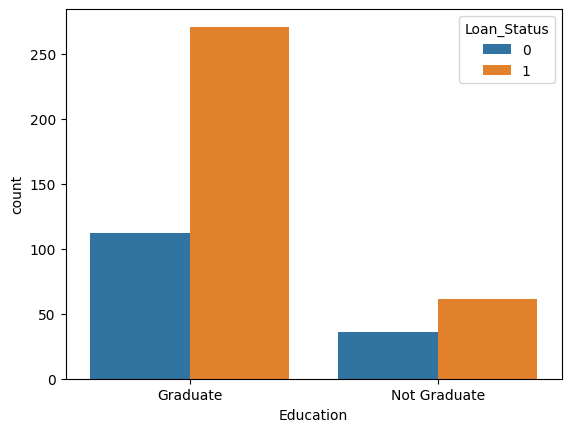

In [88]:
#education and loan_Status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

NOTE: The number of loan Approved for the Graduated people is more than the Not Graduated people.

<Axes: xlabel='Married', ylabel='count'>

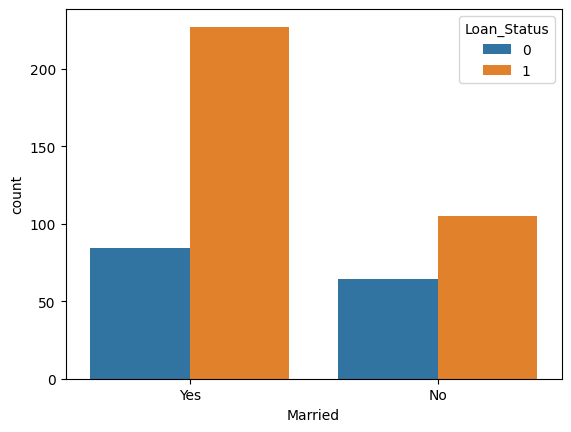

In [89]:
# martial status & Loan_status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

Note: "If the person is married the loan approval is more "

<Axes: xlabel='Gender', ylabel='count'>

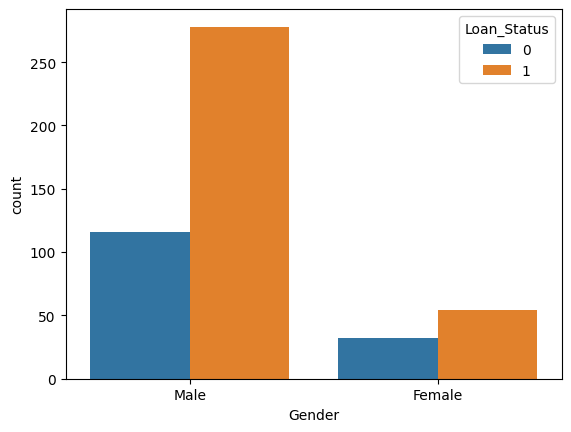

In [90]:
# Gender  & Loan_status
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

Note: "Approval of loan for the Male is More"

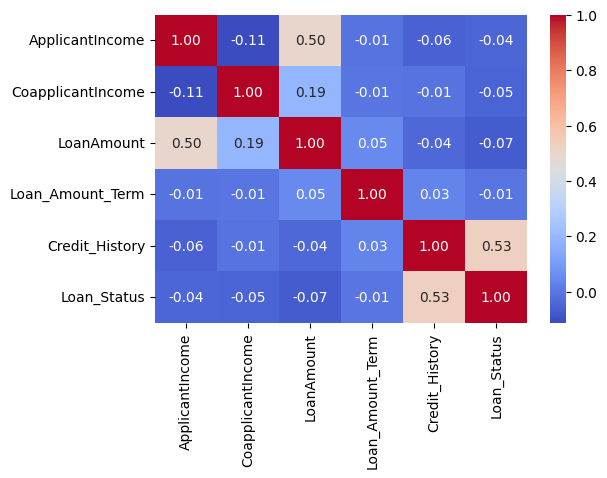

In [91]:
corr = loan_dataset.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [92]:
loan_dataset['Gender'].value_counts()

,count
Gender,
Male,394
Female,86


In [93]:
# covert categotical columns to numerical values
loan_dataset.replace({'Married':{'No':0 ,'Yes': 1},'Gender':{'Male':1 , 'Female':0}, 'Self_Employed':{'No':0,'Yes': 1}, 'Property_Area': { 'Rural':0 ,'Urban':1 ,'Semiurban':2} , 'Education':{'Graduate':1, 'Not Graduate':0}} , inplace=True )

/tmp/ipython-input-1326235246.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0 ,'Yes': 1},'Gender':{'Male':1 , 'Female':0}, 'Self_Employed':{'No':0,'Yes': 1}, 'Property_Area': { 'Rural':0 ,'Urban':1 ,'Semiurban':2} , 'Education':{'Graduate':1, 'Not Graduate':0}} , inplace=True )


In [94]:
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [95]:
# Seperating the data and label
X=loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y=loan_dataset['Loan_Status']

In [96]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              1
3         1        1  ...            1.0              1
4         1        0  ...            1.0              1
5         1        1  ...            1.0              1
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              1
612       1        1  ...            1.0              1
613       0        0  ...            0.0              2

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test Split

In [97]:
# splitting the  dataset into train and test data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2 , stratify=Y, random_state=2)


In [98]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


Training the Model:

Support Vector Machine

In [99]:
classifier=svm.SVC(kernel='linear')

In [100]:
# training the support vector Machine Model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [101]:
# accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [102]:
print(training_data_accuracy)

0.7708333333333334


In [103]:
# accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [104]:
print(test_data_accuracy)

0.78125


Making a predictive System

In [105]:
input_data=(0,1,0,0,1,0,5849,0,360,1,1)


#change the input data to a numpy  array
input_data_as_numpy_array=np.asarray(input_data)

# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction= classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The person is  not approved for the Loan')
else:
  print(' The person is approved for the Loan')


[0]
The person is  not approved for the Loan


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
